In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('supply_chain_data.csv')
data.head()

Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    Mumbai        29                 215   
1                37  ...    Mumbai        23                 517   
2                88  ...    Mumbai        12                 971   
3                59  ...   Kolkata        24                 937   
4                56  ...     Delhi         5                 414   

  Manufacturing lead time Manufacturing costs  Inspection results  \
0                      29           46.279879             Pending   
1                      30           33.616769             Pending   
2                      27           30.688019             Pending   
3                      18           35.624741                Fail   
4                       3           92.065161                Fail   

   Defect rates  Transportation modes   Routes       Costs  
0      0.226410                  Road  Route B  187.752075  
1      4.854068                  Road  Route B  503.065579  
2      4.580593                   Air  Route C  141.920282  
3      4.746649                  Rail  Route A  254.776159  
4      3.145580                   Air  Route A  923.440632  

[5 rows x 24 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [4]:
print('The number of rows and columns in the datset',data.shape)

The number of rows and columns in the datset (100, 24)


In [5]:
data.describe().style.background_gradient(cmap='winter_r')

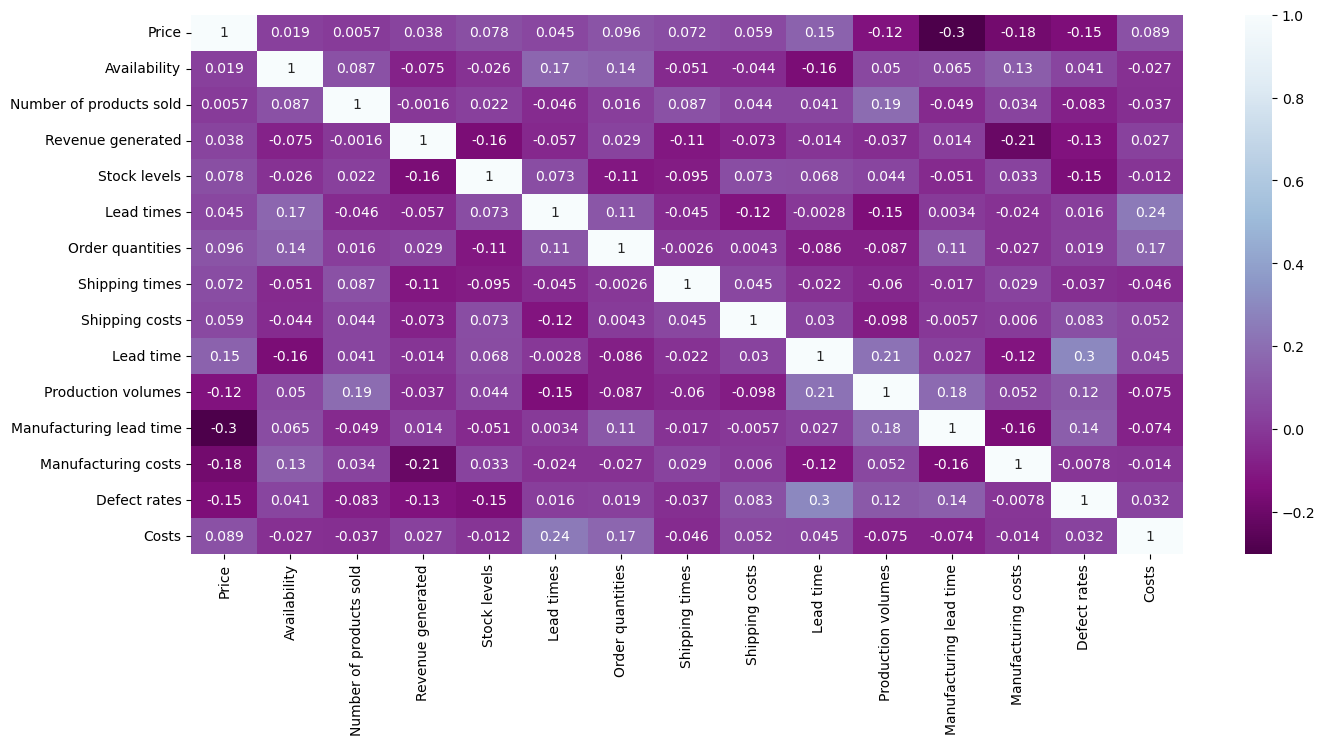

In [6]:
plt.figure(figsize=(16,7))
sns.heatmap(data.corr(),annot=True,cmap='BuPu_r')
plt.show()

In [7]:
#Checking the null values 
data.isna().sum()/len(data)

Product type               0.0
SKU                        0.0
Price                      0.0
Availability               0.0
Number of products sold    0.0
Revenue generated          0.0
Customer demographics      0.0
Stock levels               0.0
Lead times                 0.0
Order quantities           0.0
Shipping times             0.0
Shipping carriers          0.0
Shipping costs             0.0
Supplier name              0.0
Location                   0.0
Lead time                  0.0
Production volumes         0.0
Manufacturing lead time    0.0
Manufacturing costs        0.0
Inspection results         0.0
Defect rates               0.0
Transportation modes       0.0
Routes                     0.0
Costs                      0.0
dtype: float64

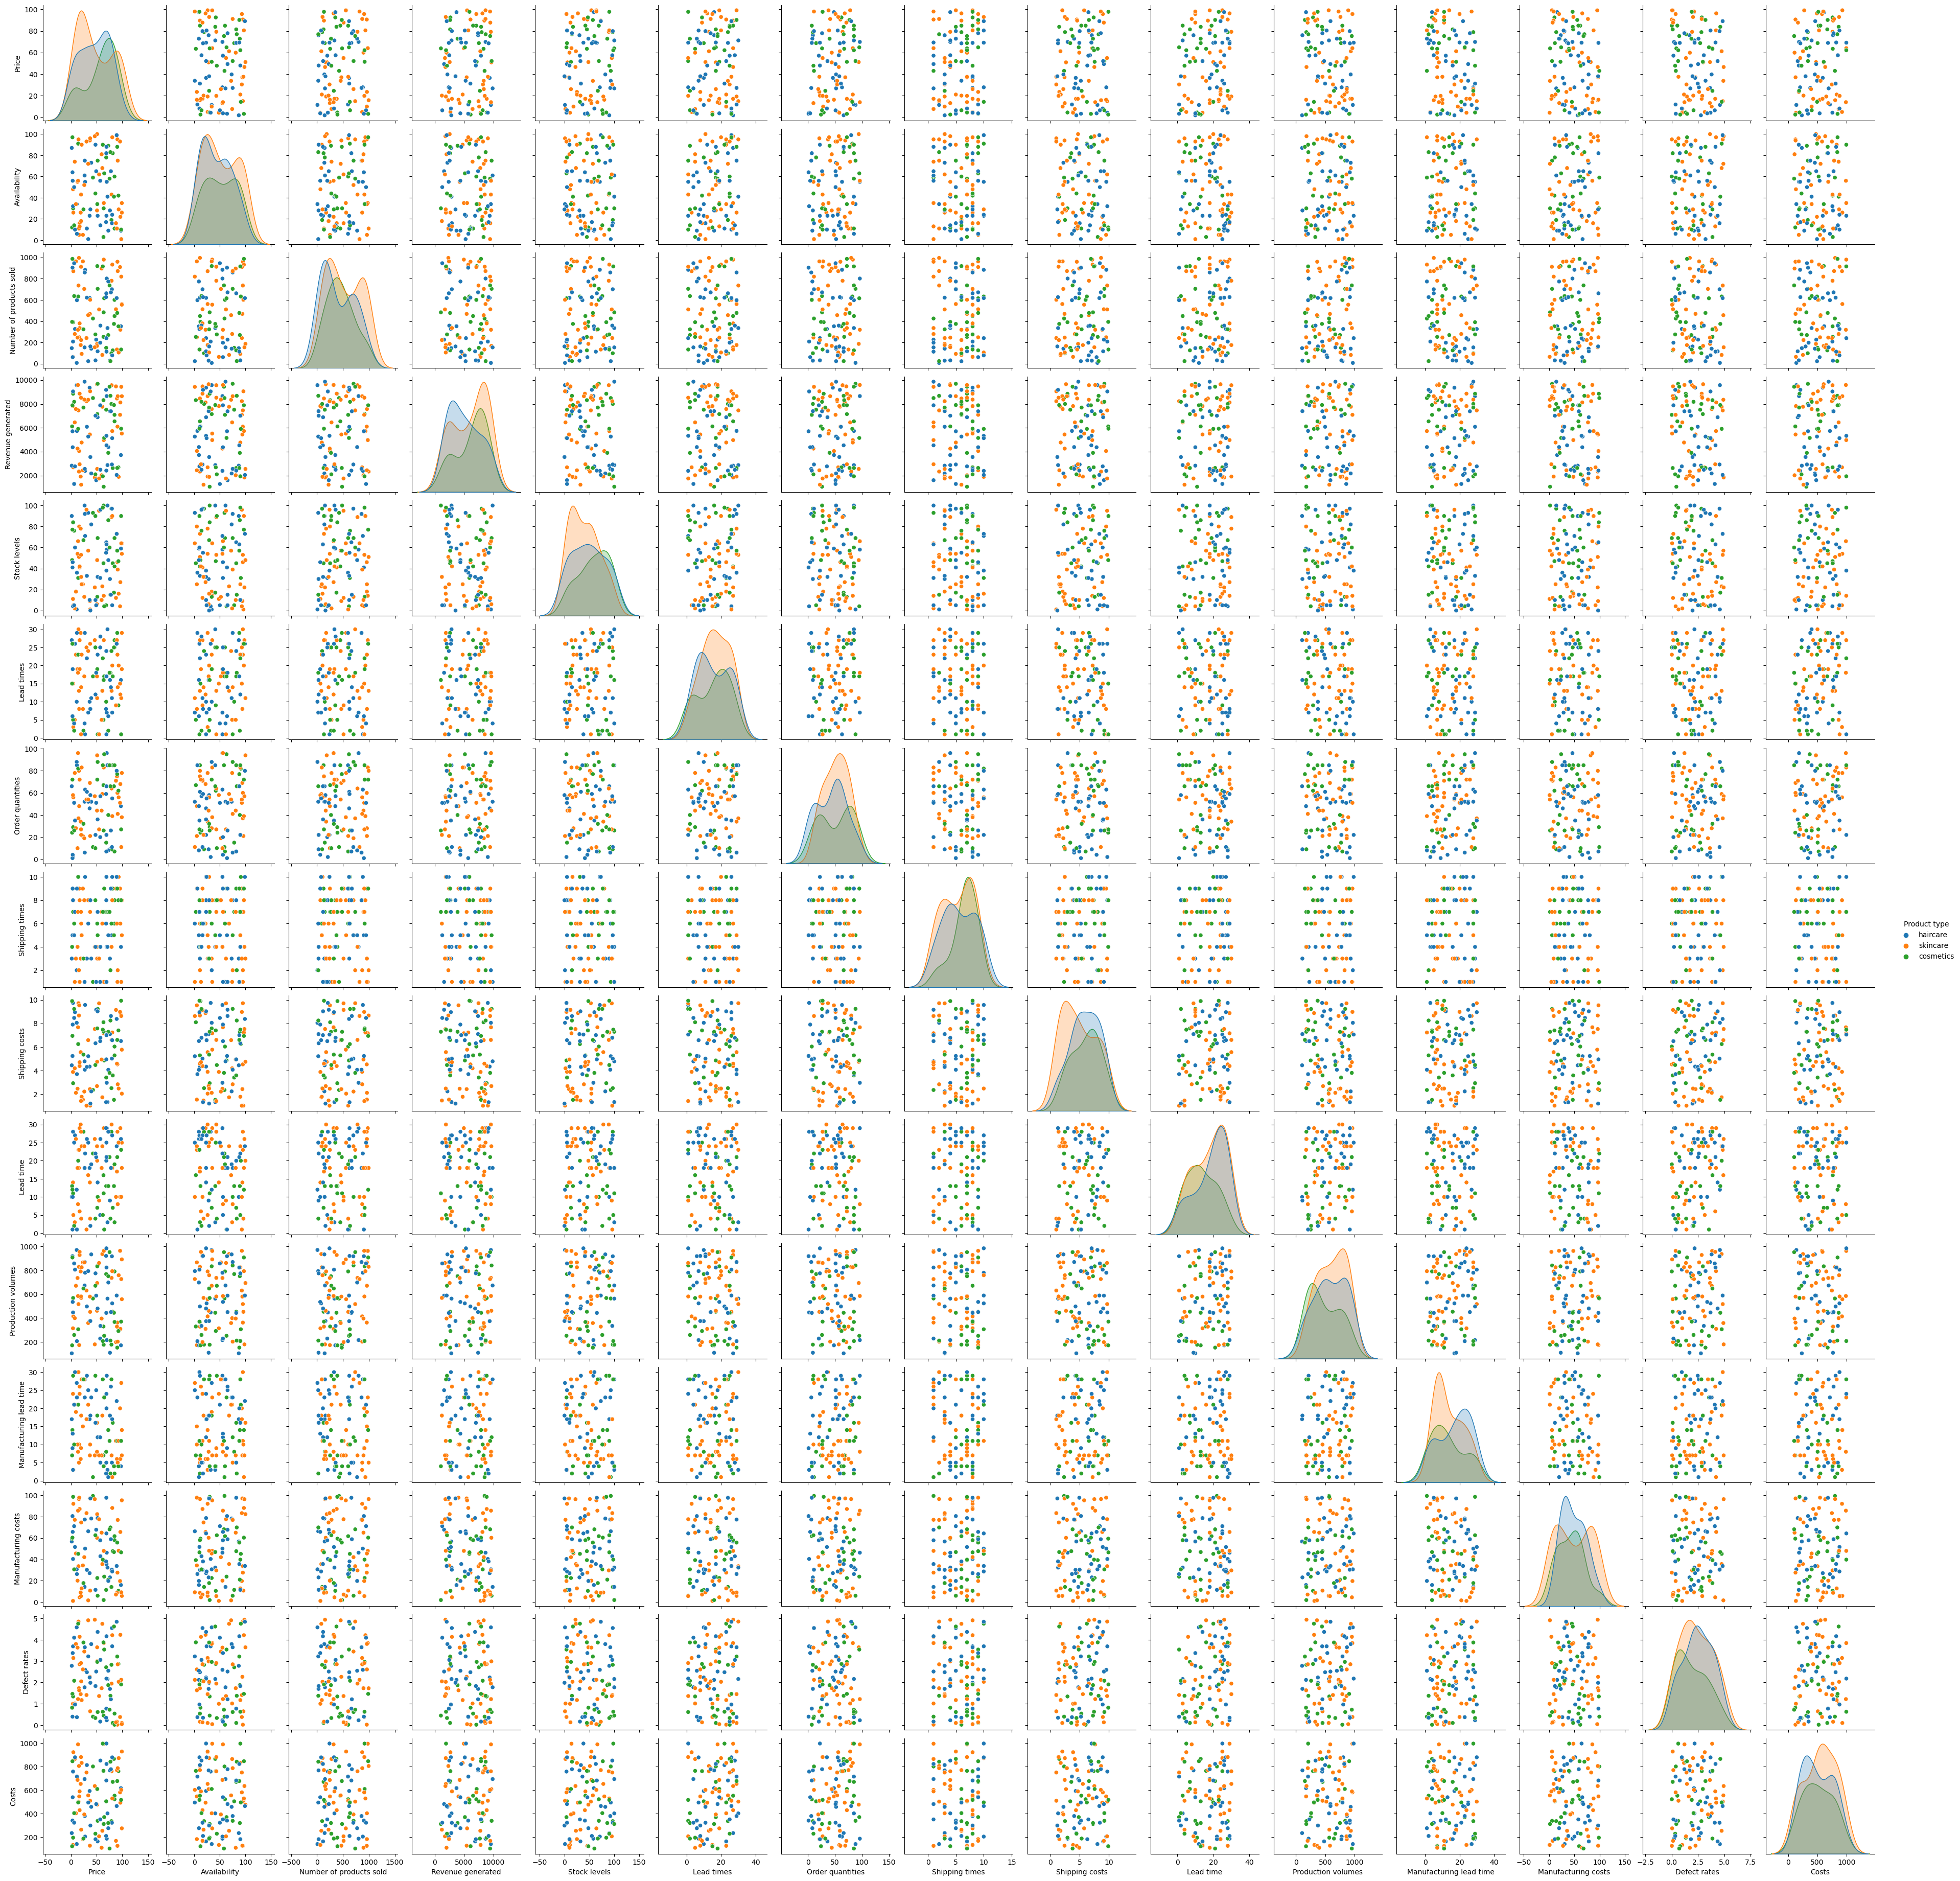

In [8]:
sns.pairplot(data,hue='Product type')

In [9]:
#Let's separate the categorical and numerical columns
categorical=[i for i in data.columns if data[i].dtypes=='object']
numerical=[i for i in data.columns if data[i].dtypes!='object']

# Explore Data Analysis (EDA)

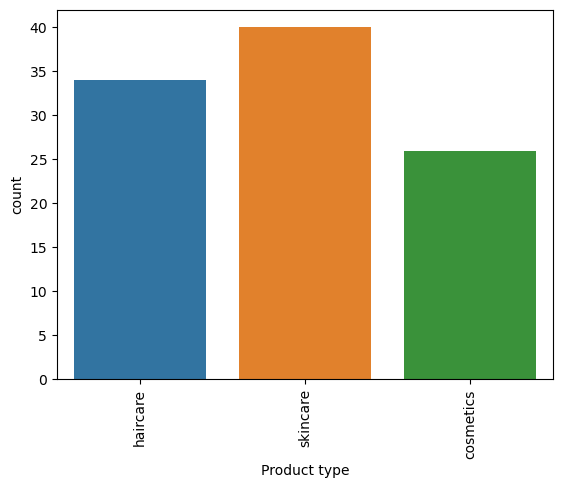

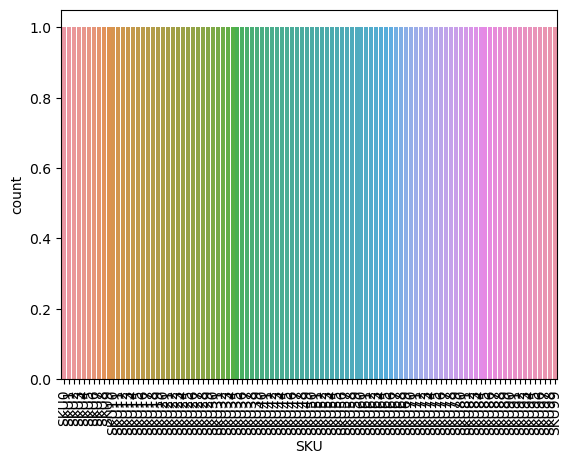

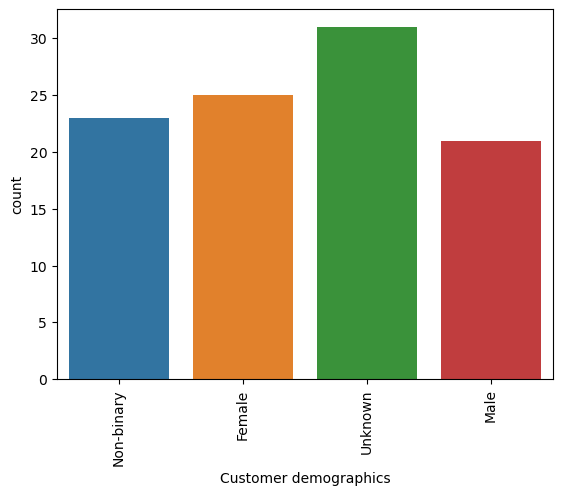

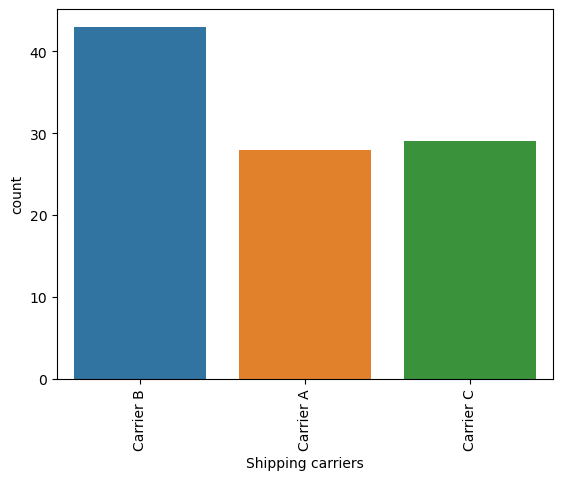

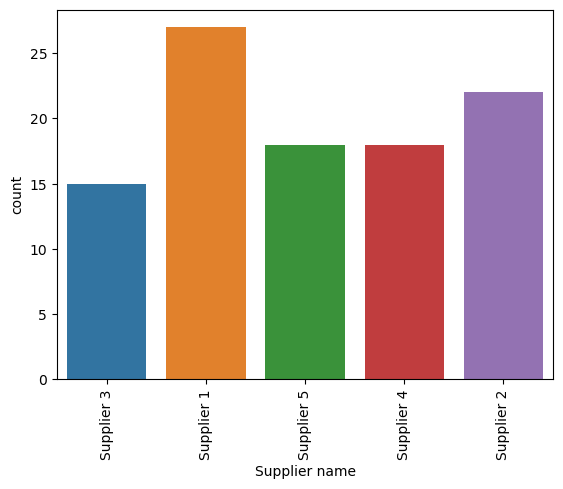

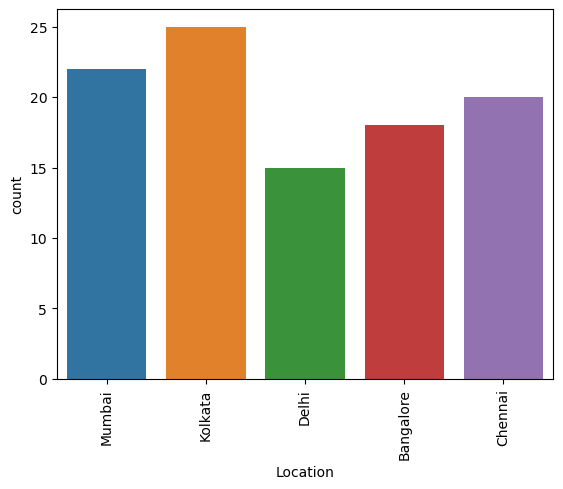

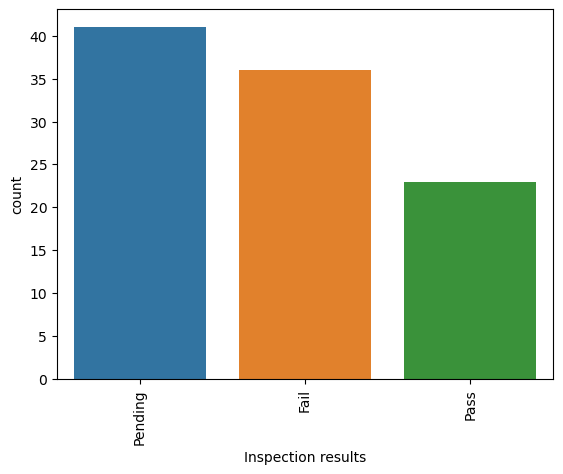

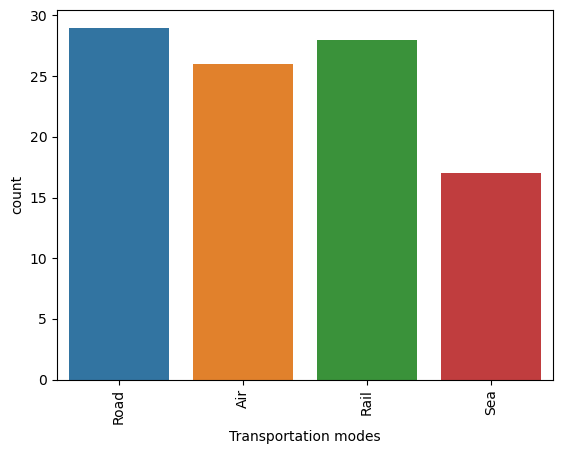

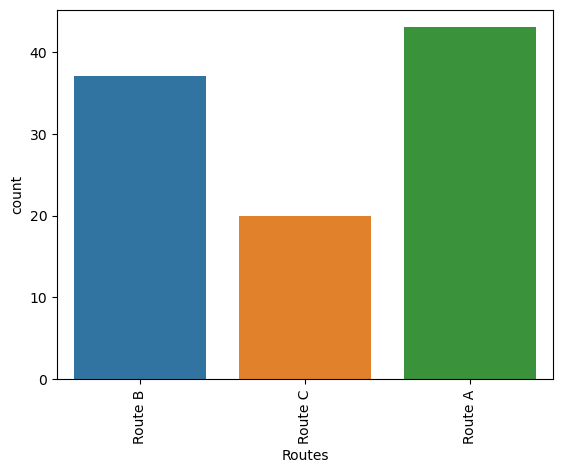

In [10]:
#Visualize the all the categorical columns value in the dataset using the countplots
for i in data.select_dtypes(include='object'):
    sns.countplot(data=data,x=data[i])
    plt.xticks(rotation=90)
    plt.show()

<AxesSubplot:>

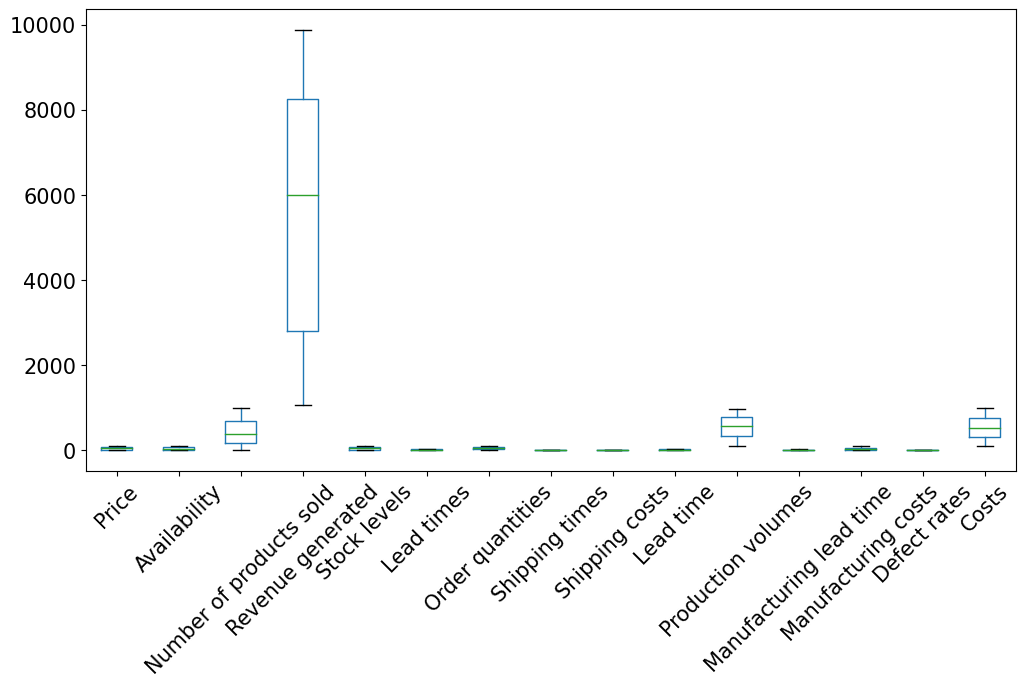

In [11]:
#visualize the boxplot with the data
plt.figure(figsize=(12,6))
data.boxplot(grid=False, rot=45, fontsize=15)

<AxesSubplot:title={'center':'Each product generated revenuve'}, xlabel='Product type'>

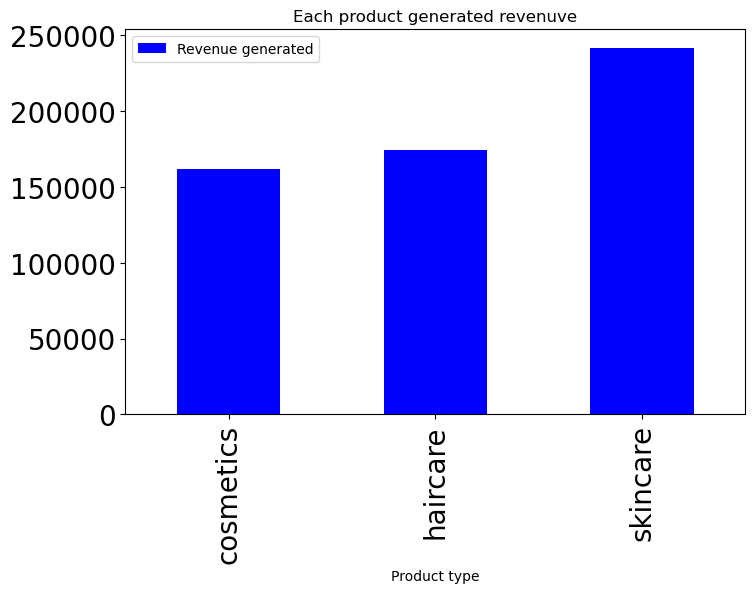

In [12]:
#we just visualize the each product type with revenue generated in the productd
data.groupby(['Product type'])[['Revenue generated']].sum()\
.plot(kind='bar',figsize=(8,5),title="Each product generated revenuve",fontsize=20,color=['blue','red','yellow'])

# ### Observations:

##### 1) The main concept of the above data to find the revenue of the products
##### 2) Skincare item's get more revenue generated and then Hair products also gain good revenue
##### 3) cosmetics get less revenue compare to other revenue item's

In [13]:
#identify the what are the location gain most revenue during the product items
data.groupby(['Product type','Location'])[['Revenue generated']].sum()\
.sort_index()\
.sort_values(by='Product type',ascending=False)\
.unstack()\
.style.background_gradient(cmap='winter_r')

## Observations:
###### 1)From the above information made create a data which product type get more revenued in location wise
###### 2) As from  the data skincare products get more revenue in kolkata and then chennai, mumbai,Bangalore and the last city was delhi
###### 3) According to the haricare products Bangalore get more revenued then Mumbai,kolkatha,chennai and the delhi will be less revenued generated
###### 4) Coming to the cosmetics Mumbai get more profit and Delhi second place the chennai,Kotkata and the bangalore will be the less revenued generated.

In [14]:
#we create a data which contain each categorey wise with total price and order quantites etc
data.groupby(['Product type']).sum()\
.sort_index()\
.style.background_gradient(cmap='Dark2_r')

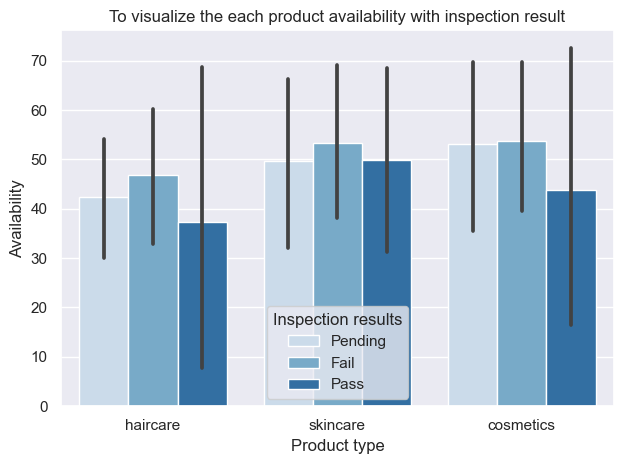

In [15]:
#We visualize the each product type in with itemes availability columns hue with inspection result
sns.set_theme(context='notebook',style='darkgrid')
sns.barplot(data=data,x='Product type',y='Availability',hue='Inspection results', palette="Blues")
plt.title("To visualize the each product availability with inspection result")
plt.tight_layout()
plt.show()

## Observations:
##### 1) Form the bar chart we visualize the each product avalibality and how many products done inspection in the process we get the product is pending and either fail or pass
##### 2) From hair care products Fail product are more compare to pending and less percentage product pass it.
##### 3) From the skin care hear also same thing happend more product fali. both pending and pass percentage are equal.
###### 4) Let's talk about cosmetics the percentage of the fail and pending nearly equal and pass percentage less.

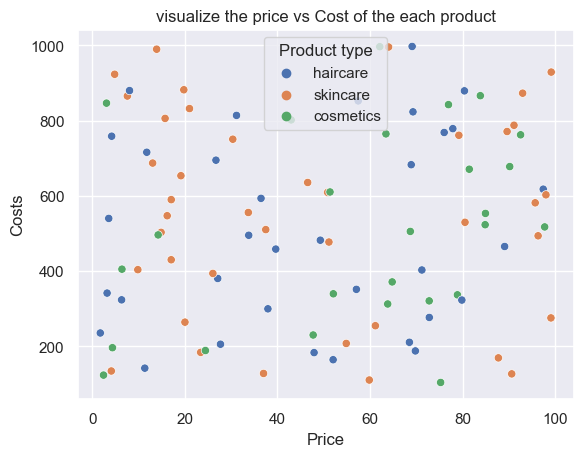

In [16]:
#Visualize the scatter plot with actually price and costs of the each product
sns.set_theme(style='darkgrid')
sns.scatterplot(data=data,x='Price',hue='Product type',y='Costs')
plt.title("visualize the price vs Cost of the each product")
plt.show()

<AxesSubplot:title={'center':'The total manufacuring cost by each product items'}, ylabel='Manufacturing costs'>

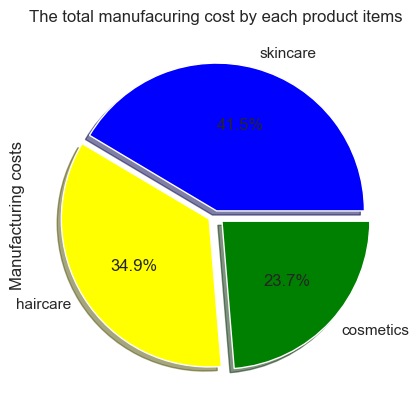

In [17]:
#what was the manufacturing costs of the product 
data.groupby(['Product type'])['Manufacturing costs'].sum()\
.sort_values(ascending=False)\
.plot(kind='pie',labels=['skincare','haircare','cosmetics'],autopct='%1.1f%%',title='The total manufacuring cost by each product items',center=(0,1),explode=[0.03,0.05,0.06],shadow=True,colors=['blue','yellow','green'])

## Observations:
###### 1) From the above data skincare has more required for manufacturing costs
###### 2) Then Hari care get less manufacruring cost compare to skin care and cosmetics get less manufacturing costs.

array([<AxesSubplot:ylabel='Defect rates'>], dtype=object)

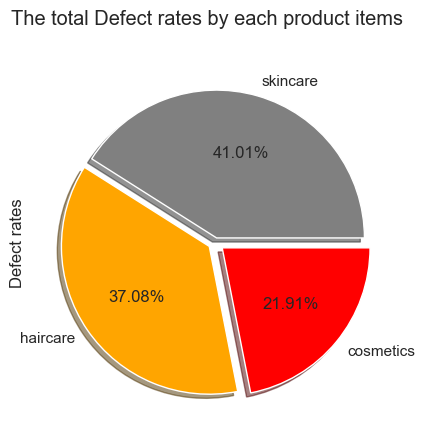

In [18]:
data.groupby(['Product type'])['Defect rates'].sum()\
.sort_values(ascending=False)\
.plot(kind='pie',labels=['skincare','haircare','cosmetics'],autopct='%1.2f%%',title='The total Defect rates by each product items',center=(0,1),explode=[0.03,0.05,0.06],shadow=True,colors=['gray','orange','red'],subplots=True)

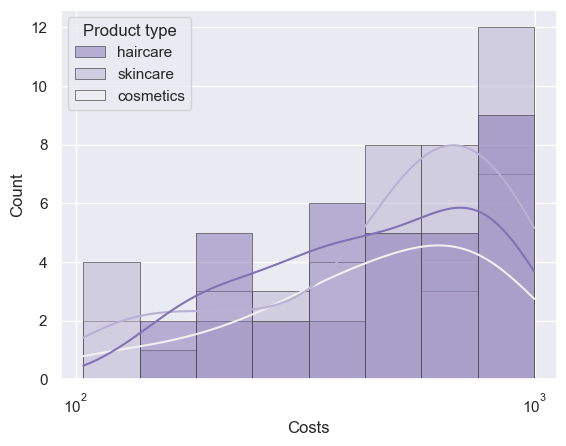

In [19]:
sns.set_theme(style='darkgrid')
sns.histplot(data=data,x='Costs',hue='Product type',palette="light:m_r",edgecolor=".3",linewidth=.5,log_scale=True,kde=True)
plt.show()

In [20]:
#create a piovt_table to under standing the total products sold in location wise with product types
pd.pivot_table(data,index='Product type',columns=['Location'],values='Number of products sold')\
.style.background_gradient(cmap='twilight_shifted_r')

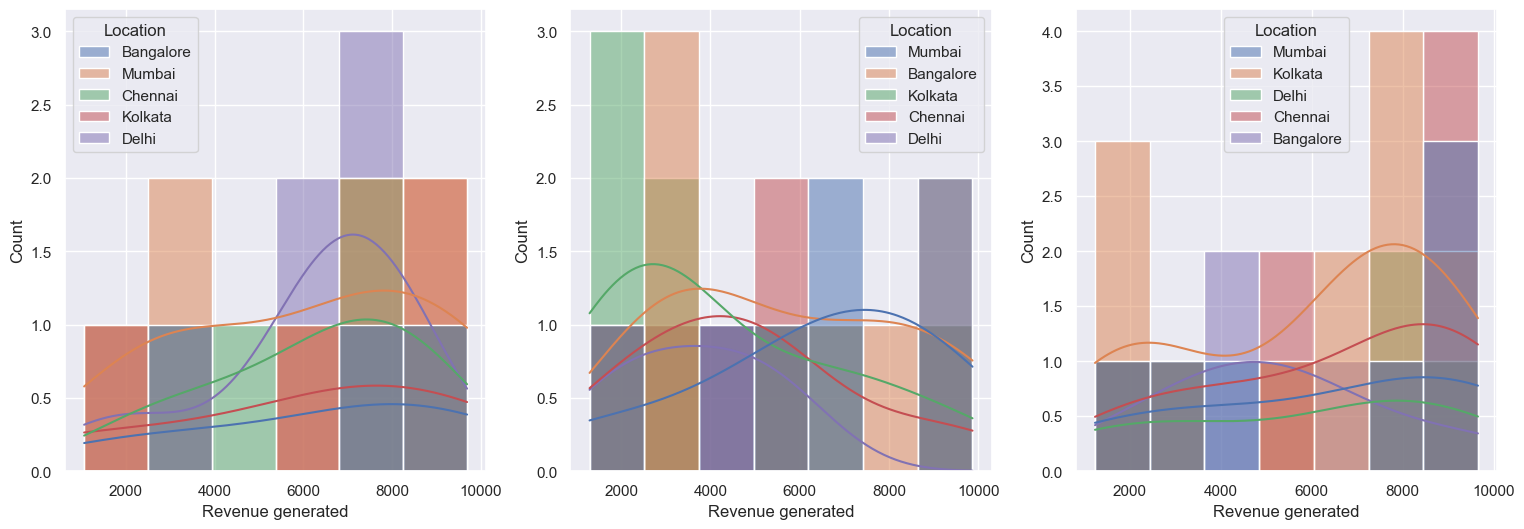

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=data[data['Product type']=='cosmetics'],x='Revenue generated',kde=True,hue='Location')
plt.subplot(142)
ax =sns.histplot(data=data[data['Product type']=='haircare'],x='Revenue generated',kde=True,hue='Location')
plt.subplot(143)
ax =sns.histplot(data=data[data['Product type']=='skincare'],x='Revenue generated',kde=True,hue='Location')
plt.show()

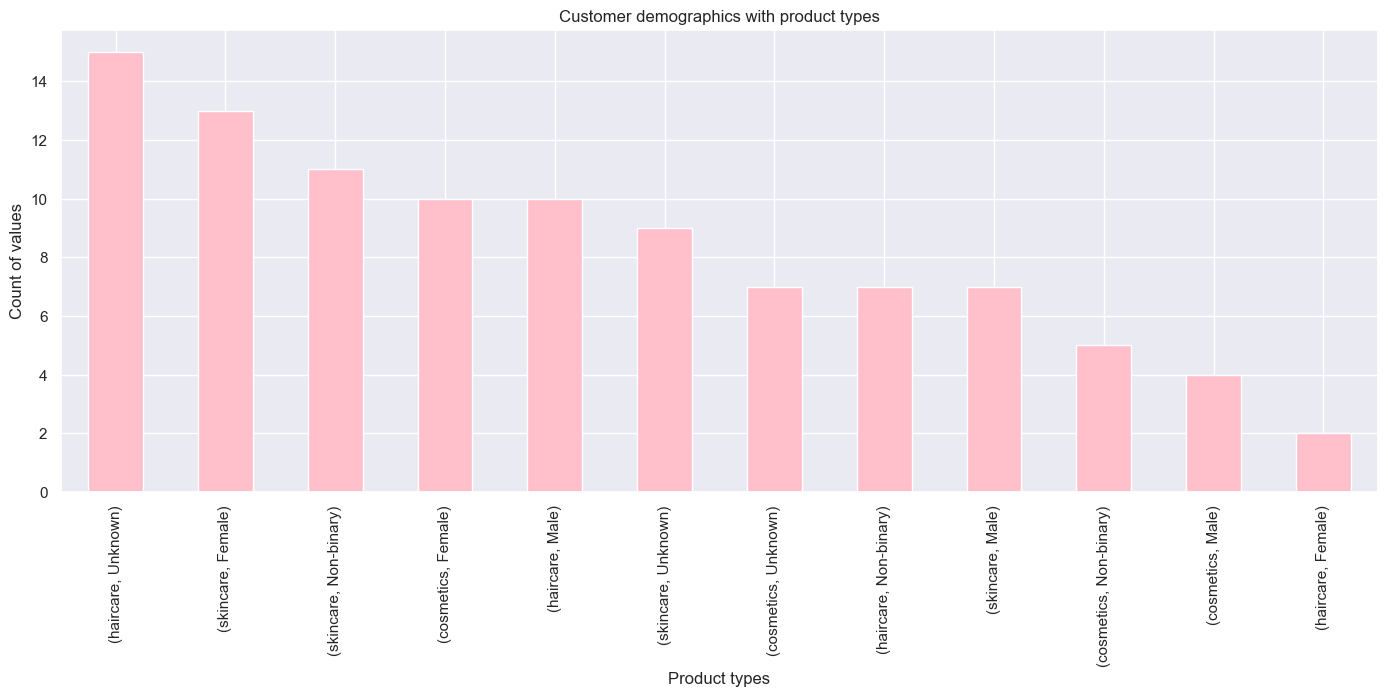

In [22]:
#To create a barchart for customers demographics
data.groupby(['Product type'])['Customer demographics'].value_counts()\
.sort_index()\
.sort_values(ascending=False)\
.plot(kind='bar',title="Customer demographics with product types",figsize=(17,6),color='pink')
plt.xlabel("Product types")
plt.ylabel("Count of values")
plt.show()

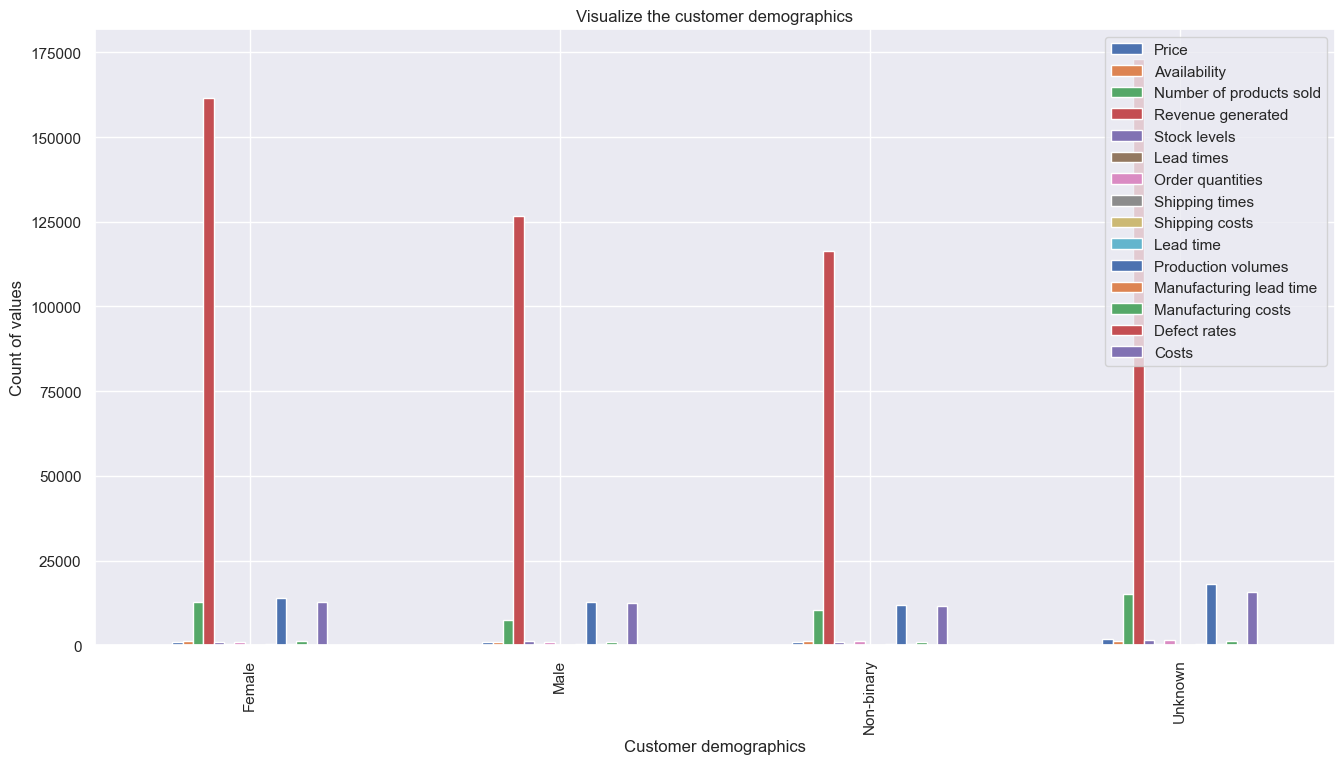

In [23]:
data.groupby(['Customer demographics']).sum()\
.sort_index()\
.plot(kind='bar',figsize=(16,8))
plt.title("Visualize the customer demographics")
plt.xlabel("Customer demographics",fontweight=20)
plt.ylabel("Count of values")
plt.show()

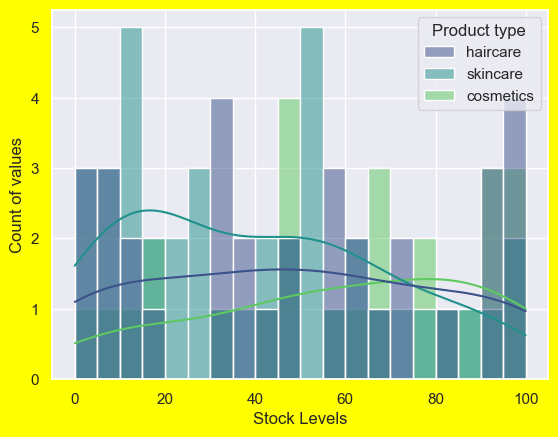

In [24]:
#distribution of stock level
sns.set_theme(style='darkgrid')
plt.rcParams['figure.facecolor']='yellow'
sns.histplot(data=data,x='Stock levels',hue='Product type',bins=20,palette='viridis',multiple='layer',element='bars',kde=True)
plt.xlabel("Stock Levels")
plt.ylabel("Count of values")
plt.show()

# Observations:
###### 1) From the above chart hightest stock lies on nearly 5 and 60 

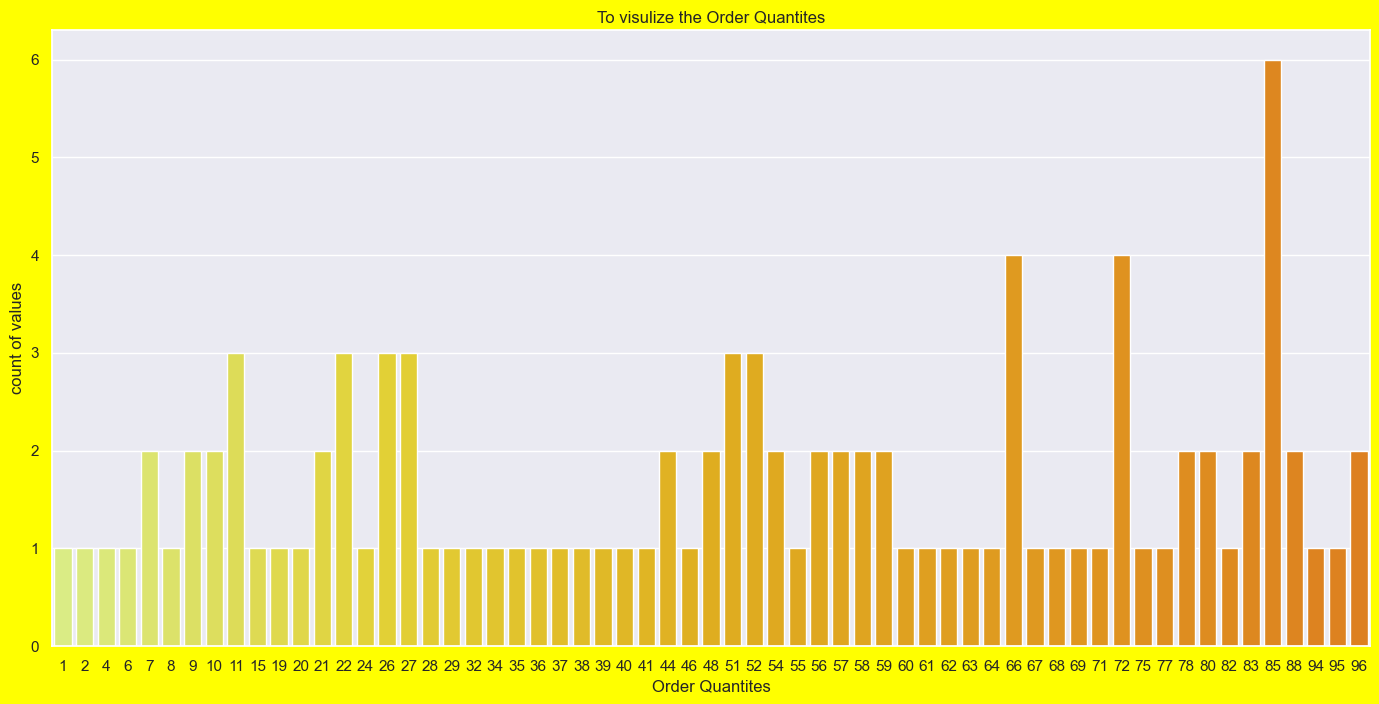

In [25]:
plt.figure(figsize=(17,8))
sns.countplot(data=data,x='Order quantities',palette='Wistia')
plt.title("To visulize the Order Quantites")
plt.xlabel("Order Quantites")
plt.ylabel("count of values")
plt.show()

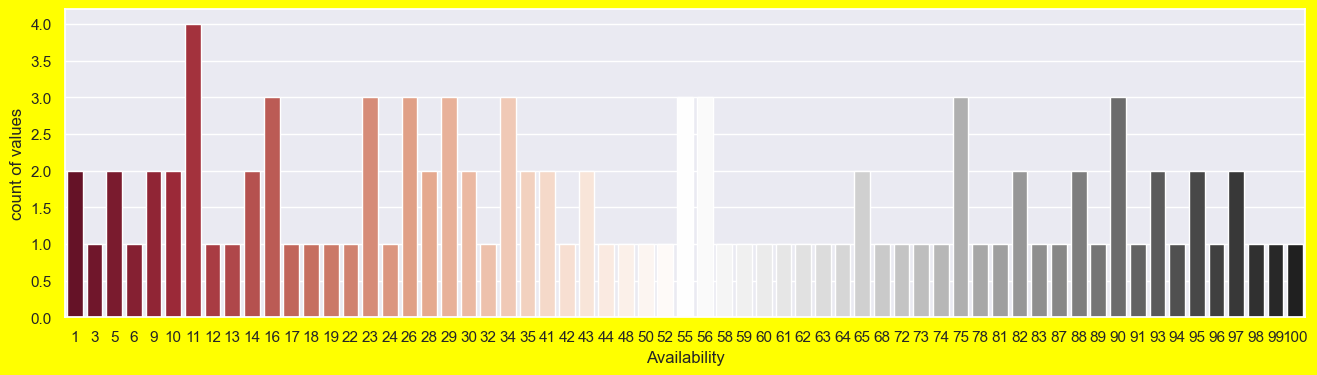

In [26]:
plt.figure(figsize=(16,4))
sns.countplot(data=data,x='Availability',palette='RdGy')
plt.xlabel("Availability")
plt.ylabel("count of values")
plt.show()

# Observations:
###### 1)From above chart's the highest quantity is 85 later 62 and 72
###### 2) In the second chart 11 was repeted 4 times which mean 11 products was avilble in 4 time and 55 and 56 availbel 3 times

In [27]:
data.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

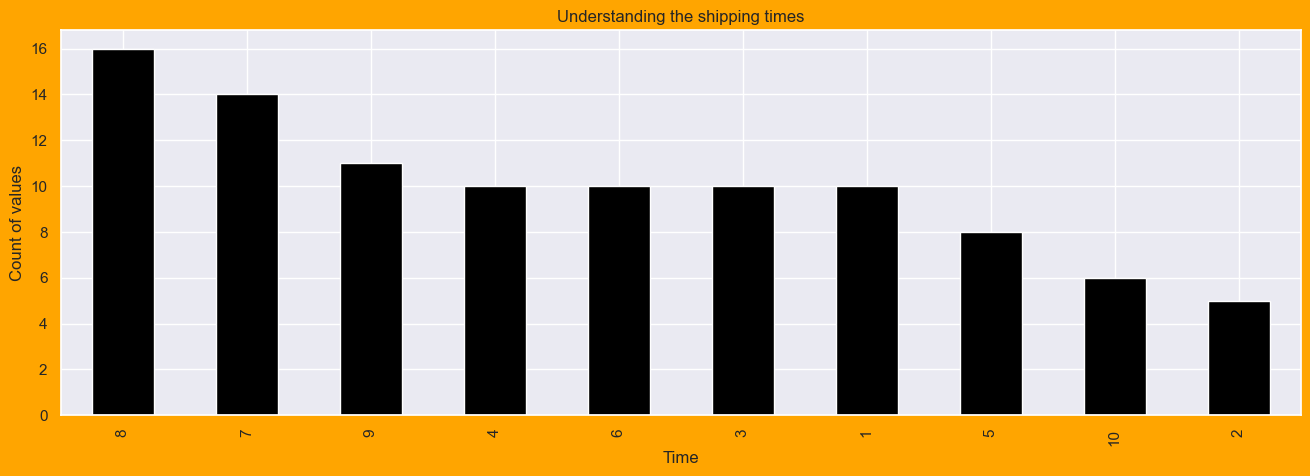

In [28]:
plt.rcParams['figure.facecolor']='orange'
data['Shipping times'].value_counts()\
.sort_values(ascending=False)\
.plot(kind='bar',title="Understanding the shipping times",figsize=(16,5),color='black')
plt.xlabel("Time")
plt.ylabel("Count of values")
plt.show()


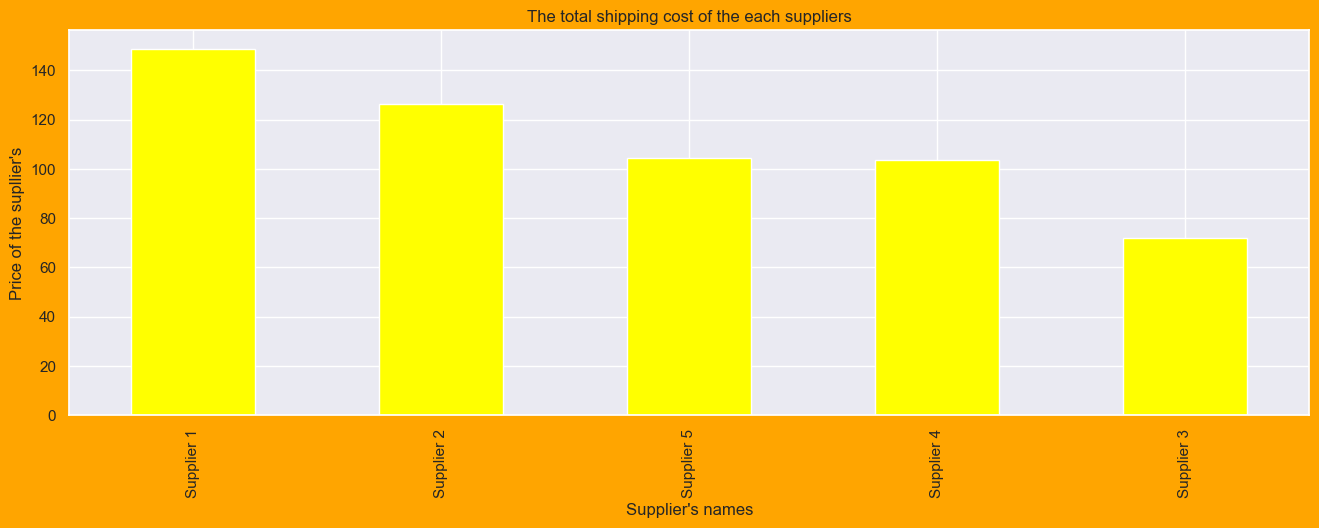

In [29]:
data.groupby(['Supplier name'])['Shipping costs'].sum()\
.sort_values(ascending=False)\
.plot(kind='bar',title="The total shipping cost of the each suppliers",figsize=(16,5),color='yellow')
plt.xlabel("Supplier's names")
plt.ylabel("Price of the supllier's")
plt.show()

### Observations:
###### 1)From the first chart most of the suppliers send their product with 8 clock and 7 clock and less number of people send their product 2 clock
###### 2)The second chart the supplier1 spend arround 148 price for shipping and supliers'3 less amount spend for shipping cost

In [30]:
#Shipping cost of the each supplies with location wise
data.groupby(['Supplier name','Location'])[['Shipping costs']].sum()\
.sort_index()\
.unstack()\
.style.background_gradient(cmap='Reds')

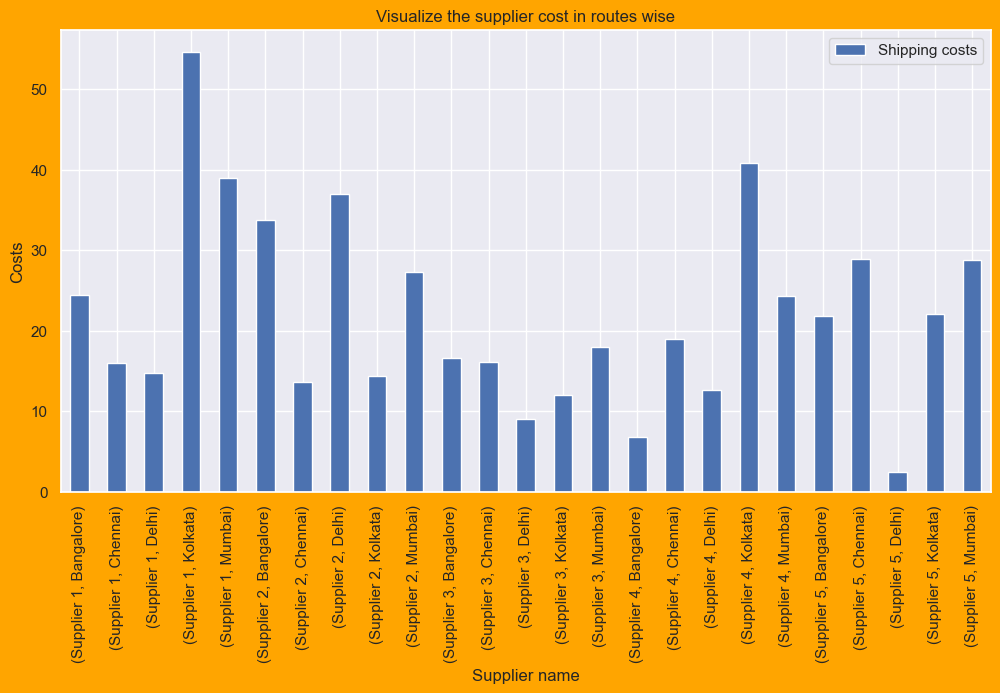

In [31]:
supplier=data.groupby(['Supplier name','Location'])[['Shipping costs']].sum()
supplier.plot(kind='bar',title="Visualize the supplier cost in routes wise",figsize=(12,6))
plt.xlabel("Supplier name")
plt.ylabel("Costs")
plt.show()

## Observations:
###### 1)Another dataframe created for identify with which location each suplies spend most shipping price
###### 2)Supplier 1 spend mores shipping cost in kolkata and mumbai.
###### 3)Supplier 2 spend mores shipping cost in Delhi and Benguluru.
###### 4)Supplier 3 spend mores shipping cost in Benguluru and mumbai.
###### 5)Supplier 4 spend mores shipping cost in kolkata and mumbai.
###### 6)Supplier 5 spend mores shipping cost in chennai and mumbai.

In [32]:
#Visualize the overal cost price of shipping carries in different location wise
'''
We use a groupby function with shipping and location and cost columns 
\ used for filter and unstack function converted to rows 
and finally visualize with background color
'''
data.groupby(['Shipping carriers','Location'])['Costs'].sum()\
.unstack()\
.style.background_gradient(cmap='nipy_spectral')

## Observations:
###### 1)In the above chart carrier A received more cost in Bangalore and then Chennai get received costs.
###### 2)In the above chart carrier B received more cost in Kolkata and then Bangalore get received costs.
###### 3)In the above chart carrier C received more cost in Chennai and then Delhi get received costs.

In [33]:
'''
We create a pivot tabel for each supliers spend most cost with routes 
wise, we take index as supplier name columns routes and
values are costs once we done with visualize with background color

'''
pd.pivot_table(data,index='Supplier name',columns=['Routes'],values='Costs')\
.style.background_gradient(cmap='YlOrBr')

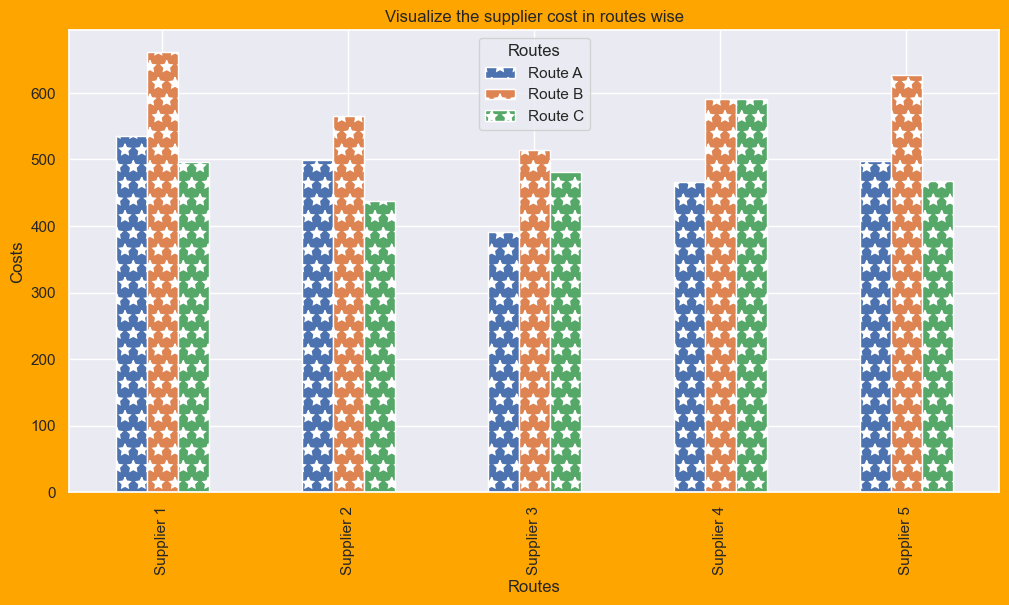

In [34]:
supp=pd.pivot_table(data,index='Supplier name',columns=['Routes'],values='Costs')
supp.plot(kind='bar',title="Visualize the supplier cost in routes wise",figsize=(12,6),hatch='*')
plt.xlabel("Routes")
plt.ylabel("Costs")
plt.show()

In [35]:
'''Same as above pivot table but this time we find the cost of each supplies with transportaion modes
which mean each suplier which transpotaion spend more cost.
'''

trans=pd.pivot_table(data,index='Supplier name',columns=['Transportation modes'],values='Costs')
trans.plot(kind='bar',title="Visualize the supplier cost in Transportation modes",figsize=(12,6),hatch='/')
plt.xlabel("Supplier name")
plt.ylabel("Costs")
plt.show()

## Observation:
###### 1)Supplier 1 spend more cost in the Air and Road.and less transporation in Sea and Rails.
###### 2)Supplier 2 spend more cost in the Air and Road.and less transporation in Sea and Rails.
###### 3)Supplier 3 spend more cost in the Rail and Sea.and less transporation in Road and Air.
###### 4)Supplier 4 spend more cost in the Road and Air,Rails.and less transporation in sea.
###### 5)Supplier 5 spend more cost in the AIr and Road.and less transporation in Sea and Rails.